# E-NEWS FULL CODE PROJECT

### Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

### Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

Explore the dataset and extract insights using Exploratory Data Analysis.
Do the users spend more time on the new landing page than the old landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests.

#### Data Dictionary:

* user_id - This represents the user ID of the person visiting the website.
* group - This represents whether the user belongs to the first group (control) or the second group (treatment).
* landing_page - This represents whether the landing page is new or old.
* time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
* converted - This represents whether the user gets converted to a subscriber of the news portal or not.
* language_preferred - This represents the language chosen by the user to view the landing page.


In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

# Question 1. Explore the dataset and extract insights using Exploratory Data Analysis.

In [2]:
# Read given data and dissect

data = pd.read_csv('abtest.csv')

data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [3]:
data.shape

(100, 6)

#### Observation: The abtest dataframe has 100 rows and 6 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [5]:
data.isnull().value_counts()

user_id  group  landing_page  time_spent_on_the_page  converted  language_preferred
False    False  False         False                   False      False                 100
dtype: int64

#### Observation: There are 6 variables in the dataframe. 4 are object datatype, 1 is float and 1 is integer datatype as shown above. There are no also no missing values in the dataframe

In [6]:
data.group = data.group.astype('category')
data.landing_page = data.landing_page.astype('category')
data.converted = data.converted.astype('category')
data.language_preferred = data.language_preferred.astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observation: All object datatype have been changed to category datatype. Memory usage reduction of 2.2 KB

In [8]:
# Summary statistics

data.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observation: From the above statistical summary, we can infer that there are 100 unique users that visit the landing page. The minimum time spent on a landing page is 0.19 minutes and the max time spent is 10.71 minutes, with an average of about 5.38 minutes spent by a user. 

In [9]:
data.group.value_counts()

control      50
treatment    50
Name: group, dtype: int64

#### There are 2 unique groups; control group with 50 users and treatment group also with 50 users

In [10]:
data.landing_page.value_counts()

new    50
old    50
Name: landing_page, dtype: int64

#### There are 2 landing pages; 50 users visit the old landing page and the other 50 visit the new one

In [11]:
data.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

#### Of the 100 users, 54 got converted and 46 remain unconverted after visiting the landing page

In [12]:
data.language_preferred.value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

#### There are 3 unique user-preferred languages; French, Spanish and English. User counts for each language shown above

# Univariate Analysis

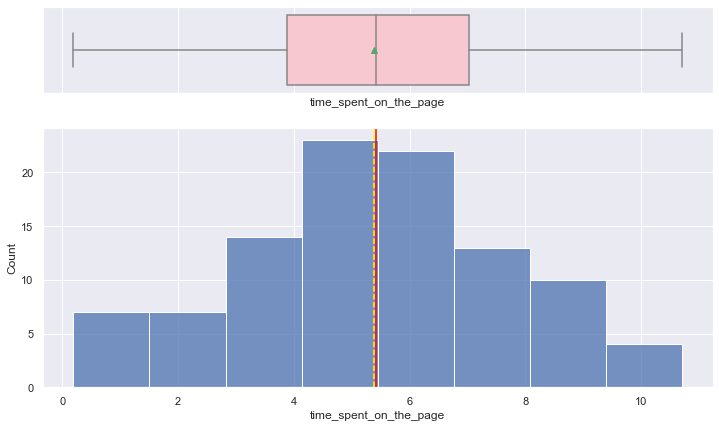

In [13]:
# Time spent on the page

# Plot histogram and boxplot on same scale

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)},figsize=figsize,)  
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="pink")
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  
    ax_hist2.axvline(data[feature].mean(), color="yellow", linestyle="--")  
    ax_hist2.axvline(data[feature].median(), color="red", linestyle="-")  

histogram_boxplot(data,"time_spent_on_the_page")

#### Observation: We see the time spent of the page variable follows a normal distribution, with population evenly spread on either side of the mean. The mean is about the same as the median as shown above.

In [14]:
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature]) 
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()     

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  
plt.show()

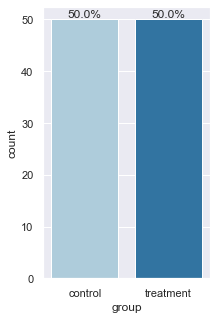

In [15]:
# Group

labeled_barplot(data,'group',perc = True)

#### Observation: The count of users in the control and treatment groups are evenly split. 

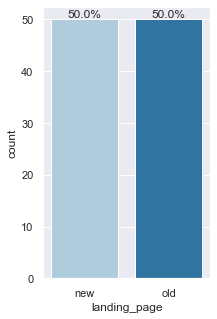

In [16]:
#Landing page

labeled_barplot(data,'landing_page',perc = True)

#### Observation: This observation is same as the previous one, with a 50/50 split of users on both landing pages.

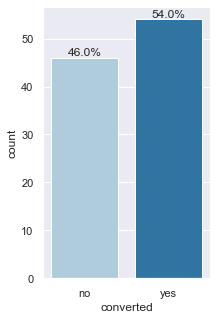

In [17]:
# Converted

labeled_barplot(data, 'converted' , perc=True)

#### Observation: Total number of converted users is higher than total unconverted users. We see a 54% to 46% split

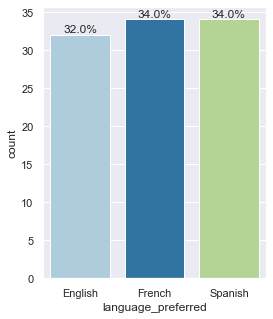

In [18]:
#Language preferred

labeled_barplot(data, 'language_preferred' , perc=True)

#### Observation: English is the least preferred language among the 3 different languages users could choose from. French and Spanish are the most preferred with an equal number of users.

In [19]:
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


# Bivariate Analysis

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

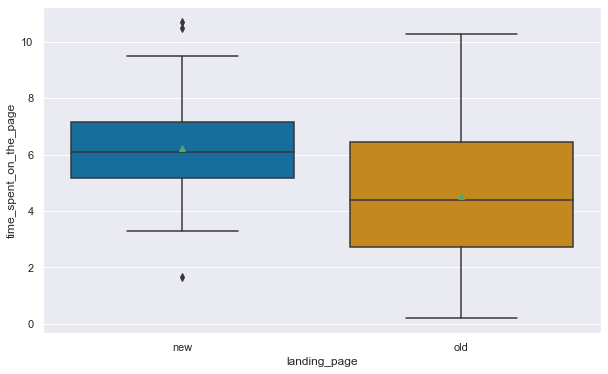

In [20]:
# Landing page vs Time spent on the page

plt.figure(figsize=(10, 6))
sns.boxplot(data = data, y = 'time_spent_on_the_page', x = 'landing_page', palette='colorblind', showmeans='True')

#### Observation: The new landing page sees users spending more time on it compared to the old landing page as shown in the above boxplot.

<AxesSubplot:xlabel='converted', ylabel='time_spent_on_the_page'>

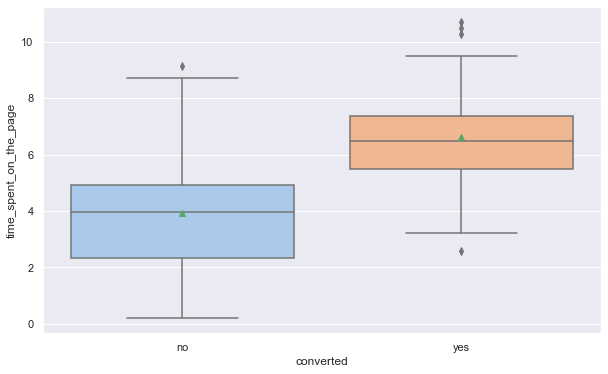

In [21]:
# Conversion status vs Time spent on the page

plt.figure(figsize=(10, 6))
sns.boxplot(data = data, y = 'time_spent_on_the_page', x = 'converted', palette='pastel', showmeans='True')

#### Observation: Users who got converted spent more time on a landing page as compared to those who got unconverted.

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

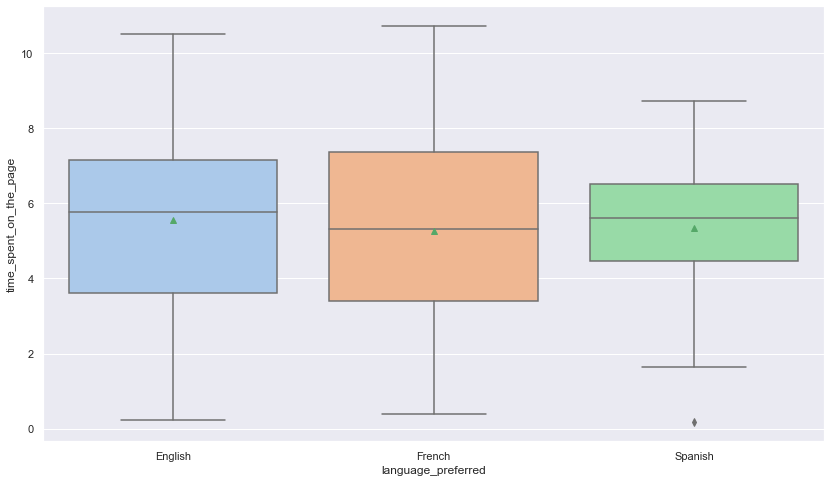

In [22]:
# Language preferred vs Time spent on the page

plt.figure(figsize=(14,8))
sns.boxplot(data=data, x = 'language_preferred', y = 'time_spent_on_the_page', showmeans='True', palette='pastel')

#### Observation: On average users spent about the same amount of time on a landing page irrespective of their preferred language. Spanish users however, show a slightly different distributioon and is the only distribution with an outlier, even though averagely about the same as the other languages

# 2. Do the users spend more time on the new landing page than the existing landing page?

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

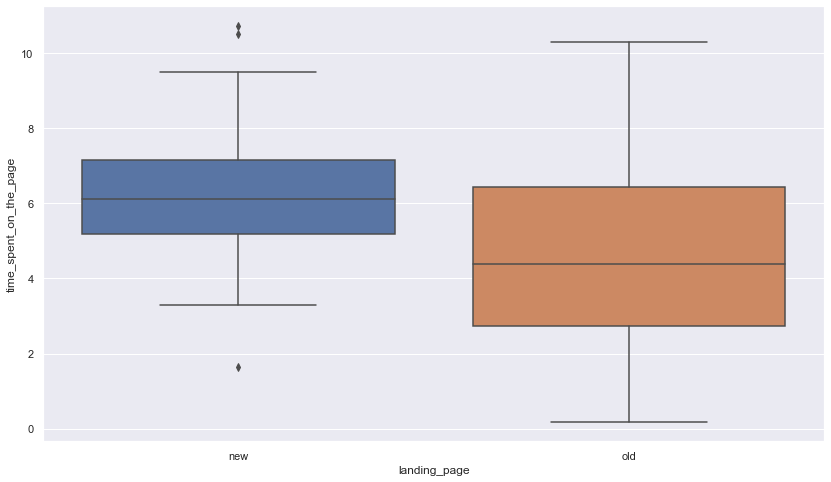

In [23]:
# Visual Analysis


plt.figure(figsize=(14,8))
sns.boxplot(data=data, x = 'landing_page', y = 'time_spent_on_the_page')

* Observation: From above boxplot we can see that users spend more time on the new landing page as compared to the old one. The least time spent on the new landing page including its outlier is more than the least time spent on the old landing page. We can also see that the highest recorded times were for that of users on the new landing page. 

> Hypothesis Testing

 Define the null and alternate hypotheses


  * Null Hypothesis;        Ho: Users spend the same time on the new landing page as the existing landing page
  * Alternative Hypothesis; Ha: Users spend more time on the new landing page than the existing landing page

Use Independent 2-Sample T-test as standard deviations of 2 populations are not known

Assume α = 0.05

In [24]:
new_times = data[data['landing_page']=='new']['time_spent_on_the_page']
old_times = data[data['landing_page']=='old']['time_spent_on_the_page']

In [25]:
from scipy.stats import ttest_ind

t,p = stats.ttest_ind(new_times, old_times, alternative='greater')

In [26]:
print('The p-value is',p)

The p-value is 0.0001316123528095005


* Inference: Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to prove that users spend more time on the new landing page than the existing (old) landing page.

# 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? 

In [27]:
# Visual Analysis

data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


<AxesSubplot:xlabel='landing_page', ylabel='count'>

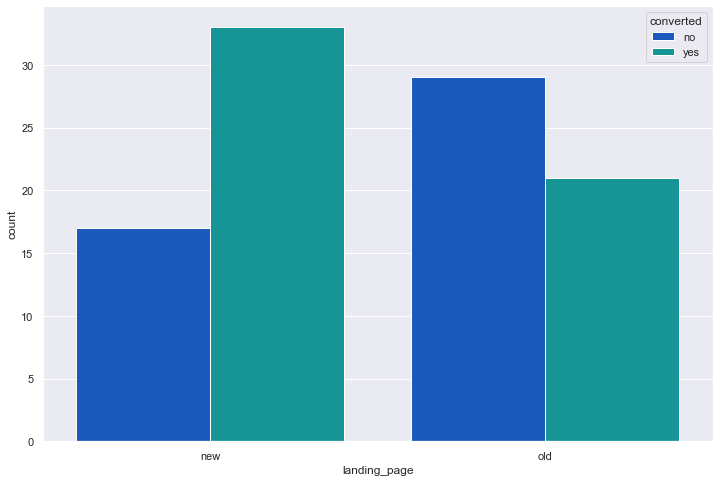

In [28]:
# Visual Analysis

plt.figure(figsize=(12,8))
sns.countplot(data = data, x = 'landing_page', hue = 'converted', palette='winter')

* Observation: We can tell right away from the countplot that more users on the new page are converted than those not converted while less users are converted than those not converted on the old page. i.e Higher conversion rate for new page than old page.

### Hypothesis Testing

   * Proportions Z test is chosen for this problem
        
        Null Hypothesis; Ho: The conversion rate for the new page = The conversion rate for the old page
                             
        Alternative Hypothesis; Ha: The conversion rate for the new page > The conversion rate for the old page
                                    
                                    
     Assume α = 0.05                              

In [29]:
# Compute conversion rates for new and old pages respectively

new_converted = data[data['landing_page'] == 'new']['converted'].value_counts()['yes']
old_converted = data[data['landing_page'] == 'old']['converted'].value_counts()['yes']

new_users = data.landing_page.value_counts()['new'] 
old_users = data.landing_page.value_counts()['old'] 
print('The numbers of users visitng the new and old pages are {0} and {1} respectively'.format(new_users, old_users))

new_prop = new_converted/new_users # New page conversion rate
old_prop = old_converted/old_users # Old page conversion rate

print('conversion rate of new landing page =', new_prop)
print('conversion rate of old landing page =', old_prop)

The numbers of users visitng the new and old pages are 50 and 50 respectively
conversion rate of new landing page = 0.66
conversion rate of old landing page = 0.42


* The proportions in the samples are different. Conduct test to check if difference is significant 

In [30]:
from statsmodels.stats.proportion import proportions_ztest

stat, p = proportions_ztest([new_converted, old_converted], [new_users, old_users], alternative='larger')

print('The p-value is', p)

The p-value is 0.008026308204056278


#### Inference: Since the p-value is less than the 5% significance level, we reject the null hypothesis. Therefore, we have enough statistical evidence to say that conversion rate for the new page is greater than the conversion rate for the old page.

# 4. Are the conversion and preferred language independent or related?

In [31]:
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


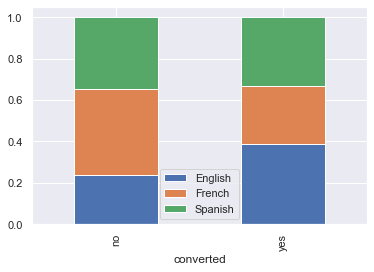

In [32]:
# Visual Analysis

pd.crosstab(data['converted'],data['language_preferred'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()

* Observation: From the stacked barplot above, we can see that more English users got converted than those who remained unconverted, followed by Spanish users who had marginally less conversions and then French users who had less conversions. However, we cannot tell for sure if these languages have a bearing on the conversion status of users. The following hypothesis test will help us to check whether we have enough statistical evidence to say that the converted status is not independent of the preferred language.

> Hypothesis Testing

   * Chi-square test of independence is chosen as we have two categorical variables
        
        Null Hypothesis; Ho: The converted status is independent of the preferred language
                             
        Alternative Hypothesis; Ha: The converted status is NOT independent of the preferred language
                                    
                                    
     Assume α = 0.05

In [33]:
# Contingency table

contingency_table = pd.crosstab(data['converted'],data['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [34]:
# Find p-value

from scipy.stats import chi2_contingency
chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', pval)

The p-value is 0.21298887487543447


#### Inference: Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Therefore, we do not have enough statistical evidence to say that the converted status is NOT independent of the preferred language

# 5. Is the time spent on the new page same for the different language users?

In [35]:
# Create new dataframe for new page users
data_new = data[data['landing_page']=='new']
data_new.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [36]:
# Confirm landing page has only 'new' entry
data_new.landing_page.value_counts()

new    50
old     0
Name: landing_page, dtype: int64

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

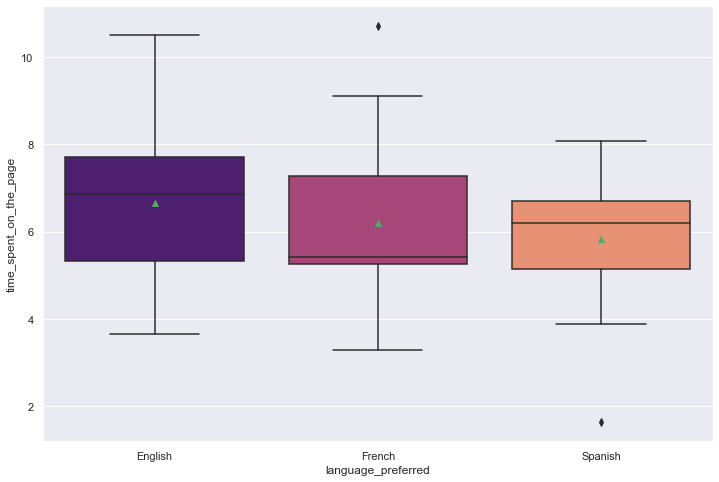

In [37]:
# Visual Analysis
plt.figure(figsize=(12,8))
sns.boxplot(data=data_new, x='language_preferred', y='time_spent_on_the_page', showmeans='True', palette='magma')

* Observation: From the time distribtuion in the above boxplot, we see that the three popolation means are not far from each other, signifying that the average time spent by a user with regards to preferred language might be almost the same. Hypothesis testing will be performed to check if this is indeed the case

> Hypothesis Testing

Null Hypothesis

Ho: μ1 = μ2 = μ3 ;The mean time spent by a user on the new landing page is equal for all three preferred languages

Alternative Hypothesis

Ha: At least one of the mean time spent by a user with respect to the three preferred languages is different from the others





   * We shall be comparing 3 population means so we could use the One-way ANOVA test, provided normality and equality of variance assumptions are verified.
        
                             
     Assume α = 0.05

* Shapiro-Wilk’s Test

Null Hypothesis; Ho : The times spent on the new page follow a normal distribution

Alternative Hypothesis; Ha : The times spent on the new page do not follow a normal distribution

In [38]:
from scipy import stats
w, p = stats.shapiro(data_new['time_spent_on_the_page'])
print('The p-value is', p)

The p-value is 0.8040016293525696


* Observation: Since the p-value is quite larger than the 5% significance level, we fail to reject the null hypothesis that the times spent on the page follow a normal distribution

* Levene's Test

Null Hypothesis; Ho : All the population variances are equal

Alternative Hypothesis; Ha : At least one variance is different from the rest

In [39]:
from scipy.stats import levene
stat, p = stats.levene(data_new[data_new['language_preferred']=='English']['time_spent_on_the_page'],
                       data_new[data_new['language_preferred']=='French']['time_spent_on_the_page'],
                       data_new[data_new['language_preferred']=='Spanish']['time_spent_on_the_page'])
print('The p-value is', p)

The p-value is 0.46711357711340173


* Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis that all population variances are equal

* Since the assumptions of normality and equality of variance have been verified, we proceed to perform the One-way ANOVA test

Assume α = 0.05

In [40]:
from scipy.stats import f_oneway

test_stat, p = stats.f_oneway(data_new[data_new['language_preferred']=='English']['time_spent_on_the_page'],
                       data_new[data_new['language_preferred']=='French']['time_spent_on_the_page'],
                       data_new[data_new['language_preferred']=='Spanish']['time_spent_on_the_page'])

print('The p-value is', p)

The p-value is 0.43204138694325955


* Inference: Since the p-value is greater than the 5% significance level we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to conclude that at least one of the mean times spent by a user on the new landing page with respect to preferred language is different from the others.

In [41]:
# Perform Tukey HSD Test to confirm no difference in means

from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog = data_new['time_spent_on_the_page'], groups=data_new['language_preferred'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7259 -2.0035  1.069  False
English Spanish  -0.8285  0.401 -2.3647 0.7078  False
 French Spanish  -0.3612  0.816  -1.874 1.1516  False
-----------------------------------------------------


* We can see from the Tukey HSD test that there is not much of a difference in mean between each pair of languages, confirming that the means are the same as earlier proven by ANOVA

# Conclusion and Business Recommendation

### From our visual analysis and hypothesis testing, we can draw the following conclusion;

* Users spend more time on the new landing page than the existing (old) landing page
* The conversion rate among users who visit the new landing page is greater than among users who visit the old landing page
* Despite this higher conversion rate among new page users than old page users, we do not have enough evidence to say that this is based on preferred language. Therefore, the conversion rate and preferred language are independent of each other from the data collected.
* The mean time spent on the new landing page is the same for all three language users

### The following recommendations are made to the business;
* The new landing page was a success in general and the opinion of users who remained unconverted should be sought in a very simple survey to see how best their needs can be accomodated to enable them also transition to the new landing page
* Since we cannot prove that conversion rate among new page users is related to preffered language, the option to choose any language when accessing the landing page should be kept open so that it is user-friendly to all
